In [1]:
import os, sys
path = os.getcwd()+"/.."
print(path)
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from  ensembler.system import system
from  ensembler.potentials.OneD import harmonicOscillator
from  ensembler.potentials.ND import envelopedPotential

from  ensembler.integrator import monteCarloIntegrator, metropolisMonteCarloIntegrator, positionVerletIntegrator, velocityVerletIntegrator
from  ensembler.conditions.thermostats import berendsenThermostate
from  ensembler.visualisation.plotSimulations import static_sim_plots
from  ensembler.visualisation.animationSimulation import animation_trajectory


c:\Users\benja\OneDrive - ETHZ\PhD\Code\ensembler_riniker_develop\examples/..


In [4]:
from scipy.stats import maxwell, boltzmann
from scipy import constants as const
mean, var, skew, kurt = maxwell.stats(moments='mvsk')
r = maxwell.rvs(loc=0, scale=5, size=1000)

(array([ 28.,  87., 178., 232., 190., 153.,  76.,  37.,  14.,   5.]),
 array([ 0.51427815,  2.36390309,  4.21352803,  6.06315297,  7.91277791,
         9.76240285, 11.6120278 , 13.46165274, 15.31127768, 17.16090262,
        19.01052756]),
 <a list of 10 Patch objects>)

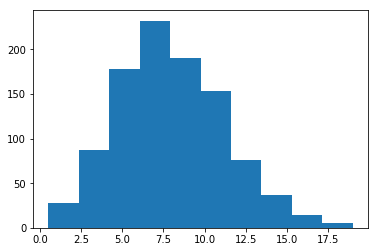

In [6]:
plt.hist(r, bins=10)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]),
 array([-0.5 , -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42,
        -0.41, -0.4 , -0.39, -0.38, -0.37, -0.36, -0.35, -0.34, -0.33,
        -0.32, -0.31, -0.3 , -0.29, -0.28, -0.27, -0.26, -0.

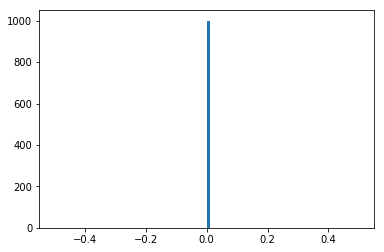

In [65]:
r = boltzmann.rvs(298, const.Avogadro, size=1000) 
plt.hist(r, bins=100)

# Plots of Simulations

## Newtonian Integrator

In [6]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!
# The temperature is not constant!!!
#settings
sim_steps = 200
pot=harmonicOscillator()
thermo = berendsenThermostate(tau=3,dt=0.01)
thermo.verbose = False
integrator = positionVerletIntegrator(dt=0.01)#maxStepSize=max_step_size,
sys=system(potential=pot, integrator=integrator, conditions=[thermo], position=-10)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=True)

print(sys.trajectory)
#plot
#static_sim_plots(sys, title="Thermostat", x_range=list(range(-10,11)))

position  temperature    totEnergy  totPotEnergy  totKinEnergy  \
0   -10.000000        298.0    50.301544     50.000000      0.301544   
1   -10.000000        298.0    53.945426     50.000000      3.945426   
2    -9.928091        298.0    75.138258     49.283492     25.854766   
3    -9.646471        298.0   443.074451     46.527205    396.547246   
4    -9.262478        298.0   780.152873     42.896745    737.256128   
5    -8.811941        298.0  1053.740933     38.825152   1014.915781   
6    -8.317469        298.0  1257.100977     34.590149   1222.510828   
7    -7.795203        298.0  1394.193069     30.382596   1363.810473   
8    -7.257206        298.0  1473.537515     26.333520   1447.203995   
9    -6.712659        298.0  1505.188164     22.529895   1482.658269   
10   -6.168576        298.0  1499.159219     19.025662   1480.133557   
11   -5.630286        298.0  1464.628054     15.850060   1448.777993   
12   -5.101786        298.0  1409.576815     13.014109   1396.562706  

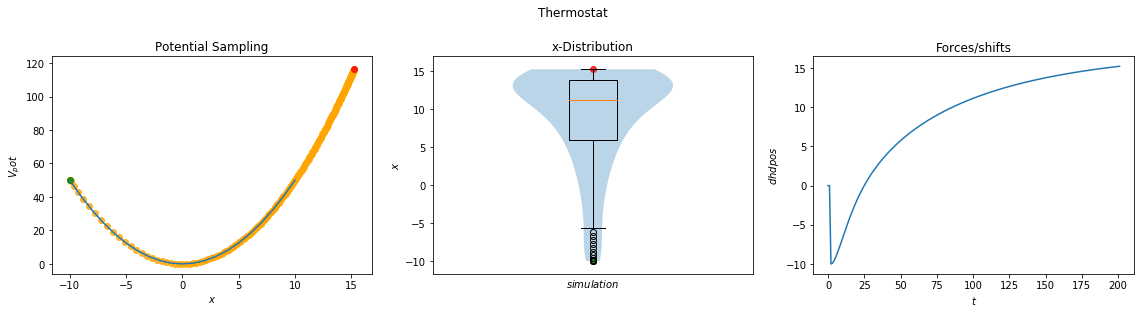

(None, <Figure size 1152x288 with 3 Axes>)

In [7]:
static_sim_plots(sys, title="Thermostat", x_range=list(range(-10,11)))

# Animations of Simulations

Ensembler.src.potentials._baseclassesin _set_singlePos_mode  1
INTEGRATOR: current forces	  -10.0
INTEGRATOR: current Velocities	  3.10010795360161
INTEGRATOR: current_position	  -10
INTEGRATOR: newVel	  13.10010795360161
INTEGRATOR: newPosition	  3.1001079536016096


INTEGRATOR: current forces	  3.1001079536016096
INTEGRATOR: current Velocities	  13.10010795360161
INTEGRATOR: current_position	  3.1001079536016096
INTEGRATOR: newVel	  10.0
INTEGRATOR: newPosition	  13.10010795360161


INTEGRATOR: current forces	  13.10010795360161
INTEGRATOR: current Velocities	  10.0
INTEGRATOR: current_position	  13.10010795360161
INTEGRATOR: newVel	  -3.1001079536016096
INTEGRATOR: newPosition	  10.0


INTEGRATOR: current forces	  10.0
INTEGRATOR: current Velocities	  -3.1001079536016096
INTEGRATOR: current_position	  10.0
INTEGRATOR: newVel	  -13.10010795360161
INTEGRATOR: newPosition	  -3.1001079536016096


INTEGRATOR: current forces	  -3.1001079536016096
INTEGRATOR: current Velocities	  -13.10010

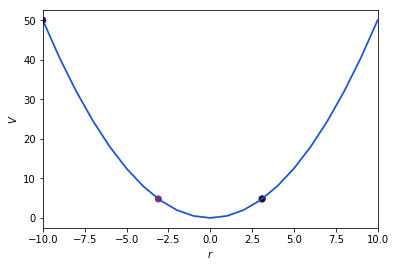

In [16]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!The temperature is not constant!!!
#settings
sim_steps = 10
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOsc()
#thermo = berendsenThermostate(tau=3, dt=1, MConstraintsDims=-1)
#thermo.verbose = True
integrator = positionVerletIntegrator(dt=1)#maxStepSize=max_step_size,
integrator.verbose = True
sys=system(potential=pot, integrator=integrator,  position=-10)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=True)
print("init_state", sys.trajectory[0], "\n")
print("last_state: ",  sys.trajectory[-1], "\n")
print("Trajectory length: ",len(sys.trajectory))

#animation
ani, out_path = animation_trajectory(sys, [x_min, x_max])

import tempfile
os.chdir(tempfile.gettempdir())
from IPython.display import HTML
HTML(ani.to_jshtml())

In [19]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!The temperature is not constant!!!
#settings
sim_steps = 100
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOsc()
thermo = berendsenThermostate(tau=20, dt=1)
#thermo.verbose = True
integrator = velocityVerletIntegrator(dt=1)#maxStepSize=max_step_size,
#integrator.verbose = True
sys=system(potential=pot, integrator=integrator, conditions=[thermo], position=-5, temperature=0)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=True)
print("init_state", sys.trajectory[0], "\n")
print("last_state: ",  sys.trajectory[-1], "\n")
print("Trajectory length: ",len(sys.trajectory))

#animation
ani, out_path = animation_trajectory(sys, [x_min, x_max])

import tempfile
os.chdir(tempfile.gettempdir())
from IPython.display import HTML
HTML(ani.to_jshtml())

Ensembler.src.potentials._baseclassesin _set_singlePos_mode  1


TypeError: can only concatenate str (not "type") to str

In [8]:
from scipy.stats import boltzmann
 
boltzmann()

TypeError: _parse_args() missing 2 required positional arguments: 'lambda_' and 'N'